In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os, sys, shutil, time 
import torch
import torchvision 
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import  FastRCNNPredictor

from torchvision.models.detection.rpn import AnchorGenerator
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from engine import train_one_epoch, evaluate

import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2 

In [9]:
image = cv2.imread('Sample_Images/test.jpg', cv2.IMREAD_COLOR)#Image.open
testimage = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
image /=  255.
image = image.transpose((2, 0, 1))
image = torch.from_numpy(image)
image=image.unsqueeze(0)
image.shape

torch.Size([1, 3, 2736, 3648])

In [2]:
model = torch.load('faster_rcnn2.pt')
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
torch.save(model.state_dict(), 'faster_rcnn.pt')

In [7]:
output = model(image)

D:\anaconda3\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


count: 26


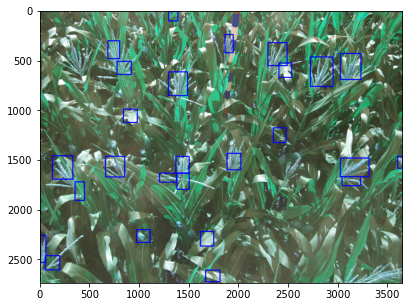

In [15]:
nms_out = (torchvision.ops.nms(boxes= output[0]['boxes'], scores= output[0]['scores'], iou_threshold= 0.1)).cpu().numpy()
#boxes, scores = output[0]['boxes'].cpu().detach().numpy().astype(np.int32), output[0]['scores'].cpu().detach().numpy()
T = 0.3 #threshold
boxes = []
scores = []
for n in nms_out:
    if output[0]['scores'][n].cpu().detach().numpy() <= T:
        continue
    boxes.append(output[0]['boxes'][n].cpu().detach().numpy().astype(np.int32))
    scores.append(output[0]['scores'][n].cpu().detach().numpy())
for box in boxes:
    cv2.rectangle(testimage,(box[0], box[1]),(box[2], box[3]),(0, 0, 255),10)
fig, ax = plt.subplots(1, figsize=(15, 5))
plt.imshow((testimage).astype(np.uint8))
print("count: "+ str(len(boxes)))

In [96]:
scores

[array(0.6106655, dtype=float32),
 array(0.6024759, dtype=float32),
 array(0.5675083, dtype=float32),
 array(0.5278671, dtype=float32),
 array(0.50126946, dtype=float32),
 array(0.49361846, dtype=float32),
 array(0.47475556, dtype=float32),
 array(0.46270213, dtype=float32),
 array(0.45937276, dtype=float32),
 array(0.43622997, dtype=float32),
 array(0.4207283, dtype=float32),
 array(0.4186524, dtype=float32),
 array(0.4095729, dtype=float32),
 array(0.4050552, dtype=float32),
 array(0.3936843, dtype=float32),
 array(0.39092755, dtype=float32),
 array(0.38796282, dtype=float32),
 array(0.38777146, dtype=float32),
 array(0.37544814, dtype=float32),
 array(0.37229794, dtype=float32),
 array(0.3487768, dtype=float32),
 array(0.33392647, dtype=float32),
 array(0.3219855, dtype=float32),
 array(0.31334874, dtype=float32),
 array(0.3102156, dtype=float32),
 array(0.3027951, dtype=float32)]

In [72]:
scores

array([0.6106655 , 0.6024759 , 0.57817864, 0.5675083 , 0.5488132 ,
       0.5484519 , 0.5465375 , 0.53821045, 0.5296902 , 0.5278671 ,
       0.51457375, 0.50165355, 0.50126946, 0.4975377 , 0.49361846,
       0.49283674, 0.47475556, 0.47457784, 0.4632388 , 0.4628491 ,
       0.46270213, 0.45937276, 0.4569746 , 0.44981843, 0.44829223,
       0.44488007, 0.44384736, 0.44320086, 0.43944627, 0.43622997,
       0.43294847, 0.42808676, 0.42554623, 0.42274097, 0.42144543,
       0.4207283 , 0.4186524 , 0.417397  , 0.41453114, 0.4095729 ,
       0.4050552 , 0.40262878, 0.3936843 , 0.39092755, 0.39044115,
       0.38974294, 0.38796282, 0.38777146, 0.38703325, 0.38642174,
       0.3861215 , 0.3830524 , 0.3821966 , 0.38157883, 0.377632  ,
       0.3766619 , 0.37588668, 0.37544814, 0.3752103 , 0.37229794,
       0.37158588, 0.37068403, 0.36586308, 0.36132345, 0.36102146,
       0.3606443 , 0.35603574, 0.35462213, 0.35187826, 0.34998867,
       0.3487768 , 0.34808326, 0.3442871 , 0.33847722, 0.33707

In [ ]:
# NMS 
nms_out = (torchvision.ops.nms(boxes= outputs[0]['boxes'], scores= outputs[0]['scores'], iou_threshold= 0.5)).cpu().numpy()
print(f"nms_out is {nms_out}")

outputs = [{k: v.to(cpu_device) for k,v in t.items()} for t in outputs]
print(f"outputs is {outputs}")
outs_val = outputs[nms_out[0]]['boxes'].cpu().detach().numpy().astype(np.int32)
# outs_val = outs_val[nms_out[0]]


for box in outs_val:
    print(f"box is {box}")
    cv2.rectangle(sample_val,
                #   (box, box),
                #   (box[2], box[3]),
                  (box[0], box[1]),
                  (box[2], box[3]),
                  (0, 0, 225),
                  2
                  )


# image = cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (0,0,225 ), 2)

plt.imshow((sample_val).astype(np.uint8))

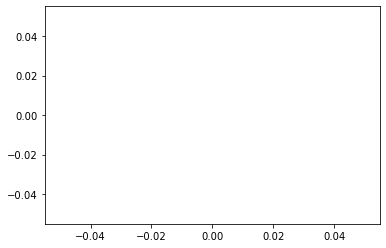

In [2]:
plt.plot()
plt.show()

In [3]:
trainimagePath='yolo_model/dataset/images/train'
trainlabelPath='yolo_model/dataset/labels/train/FASTER-RCNN'
valimagePath='yolo_model/dataset/images/val'
vallabelPath='yolo_model/dataset/labels/val/FASTER-RCNN'

label_txt = []
delete = []

print("Train Image:" + str(len(os.listdir(trainimagePath))))
print("Train Label:" +str(len(os.listdir(trainlabelPath))))
for filename in os.listdir(trainlabelPath):
    word = filename[:-4]
    label_txt.append(word)
for file in os.listdir(trainimagePath):
    if file[:-4] not in label_txt:
        delete.append(file)
print(delete)
print(len(delete))

Train Image:170
Train Label:170
[]
0


In [4]:
label_txt = []
delete = []
print("Val Image:" +str(len(os.listdir(valimagePath))))
print("Val Label:" +str(len(os.listdir(vallabelPath))))
for filename in os.listdir(vallabelPath):
    word = filename[:-4]
    label_txt.append(word)
for file in os.listdir(valimagePath):
    if file[:-4] not in label_txt:
        delete.append(file)
print(delete)
print(len(delete))

Val Image:168
Val Label:168
[]
0


In [5]:
from glob import glob
import xml.etree.ElementTree as ET
from matplotlib import patches

In [9]:
df = []
cnt = 0
annotations = glob('./yolo_model/dataset/labels/train/FASTER-RCNN/*.xml')
for file in annotations:
    filename = file.split('\\')[-1]
    filename =filename.split('.')[0] + '.jpg'
    row = []
    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        file_class = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        row = [filename, file_class, xmin, xmax, ymin, ymax]
        df.append(row)
        cnt += 1
data = pd.DataFrame(df, columns=['filename', 'class', 'xmin', 'xmax', 'ymin', 'ymax'])

data[['filename', 'class', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('train.csv', index=False)

In [10]:
df = []
cnt = 0
annotations = glob('./yolo_model/dataset/labels/val/FASTER-RCNN/*.xml')
for file in annotations:
    filename = file.split('\\')[-1]
    filename =filename.split('.')[0] + '.jpg'
    row = []
    parsedXML = ET.parse(file)
    for node in parsedXML.getroot().iter('object'):
        file_class = node.find('name').text
        xmin = int(node.find('bndbox/xmin').text)
        xmax = int(node.find('bndbox/xmax').text)
        ymin = int(node.find('bndbox/ymin').text)
        ymax = int(node.find('bndbox/ymax').text)

        row = [filename, file_class, xmin, xmax, ymin, ymax]
        df.append(row)
        cnt += 1
data2 = pd.DataFrame(df, columns=['filename', 'class', 'xmin', 'xmax', 'ymin', 'ymax'])

data2[['filename', 'class', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('test.csv', index=False)

Image size is (2736, 3648, 3)


<Figure size 432x288 with 0 Axes>

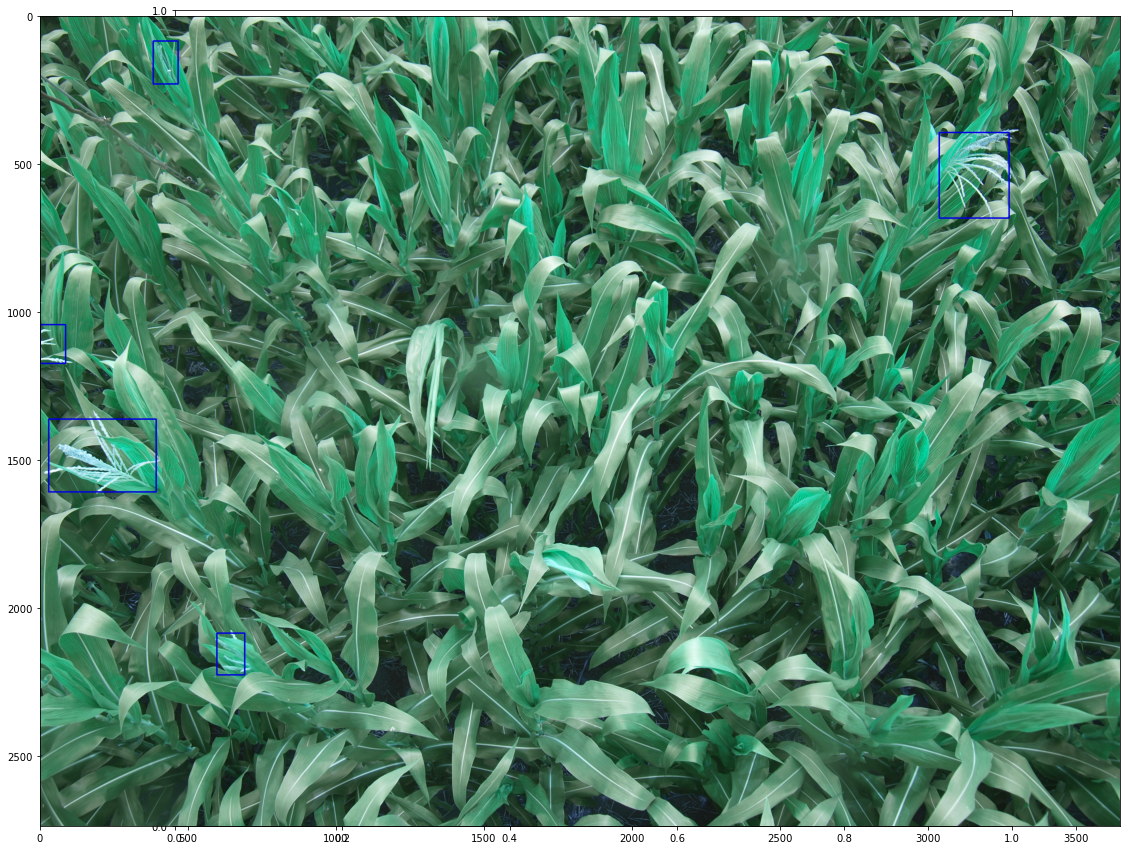

In [16]:
fig = plt.figure()
fig, ax = plt.subplots(1, figsize=(15, 15))
ax = fig.add_axes([0,0,1,1])
#plot a picture
pic_name = 'T0001_XM_20110809100243_02.jpg' 
image = cv2.imread('yolo_model/dataset/images/train/T0001_XM_20110809100243_02.jpg')
print(f'Image size is {image.shape}')
for _,row in data[data.filename == pic_name].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax


    image = cv2.rectangle(image, (xmin,ymin), (xmax, ymax), color=(0,0,225 ), thickness=3)
    plt.imshow(image)

In [17]:
import torch
import torchvision 
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.faster_rcnn import  FastRCNNPredictor

from torchvision.models.detection.rpn import AnchorGenerator
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
from engine import train_one_epoch, evaluate

In [31]:
print(len(data['filename'].unique()))
print(len(data2['filename'].unique()))

170
168


In [32]:
device= torch.device("cpu")

In [33]:
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2 

In [34]:
class MaizeData(Dataset):

    def __init__(self, dataframe, image_dir, transforms= None):
        super().__init__()

        self.df = dataframe
        self.image_dir = image_dir
        self.image_ids = dataframe['filename'].unique()
        print(f'self.image_ids is {self.image_ids.shape}')
        print('new dir is',self.image_dir)
        self.transforms = transforms

    def __getitem__(self, index: int):
        # print(f'index is {index} and image_id is {self.image_ids[index]}')
        image_id = self.image_ids[index]
        records = self.df[self.df['filename'] == image_id]

        # read image into cv2 format
        # image = Image.open(os.path.join(self.image_dir, image)).convert("RGB")
        
        image = cv2.imread(os.path.join(self.image_dir, image_id), cv2.IMREAD_COLOR)#Image.open
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /=  255.
        # print(f'image_dir is {self.image_dir}')#, image shape is {image.shape}, \n ')
       

        # find are based on xmin, ymin, xman, and yman
        boxes = records[['xmin', 'ymin', 'xmax', 'ymax']].values
        
        # print(f'boxes is {boxes}')
        
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        
        
        # print(f'area is {area}')

        # conver boxes and are into tensors
        
        # boxes = torch.as_tensor(boxes, dtype= torch.float32)
        
        area  = torch.as_tensor(area, dtype=torch.float32)

        # there is one class only
        iscrowd = torch.zeros((boxes.shape[0], ), dtype=torch.int64)
        # print('here')
        labels = torch.ones((boxes.shape[0], ), dtype=torch.int64)
       

        # create a dictionary target
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd
        # print('there')

        # # transforms
        if self.transforms is not None:
            # image = self.transforms(image)
            sample = {'image': image,
                      'bboxes': target['boxes'],
                      'labels': labels
                      }
            sample = self.transforms(**sample)
            image = sample['image']
        
        # zip boxes, map as tensor, create tuple and stack
        target['boxes'] = torch.stack(tuple(map(torch.tensor, zip(*sample['bboxes'])))).permute(1, 0)

        return image, target

    def __len__(self) -> int:
        return self.image_ids.shape[0]
        # return 10 # returns only 10 images - use it for overfitting the model

In [35]:
def get_train_transform():
    return A.Compose([
        A.Flip(0.5),
        ToTensorV2(p=1.0)], # P(prob/apply aug) = 0.1, numpy HWC -> tensor CHW
    bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

def get_test_transform():
    return A.Compose([
        ToTensorV2(p=1.0)], 
    bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [36]:
class Averager:
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property # decorator same as property method
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total /self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0

In [37]:
batch_size = 10
img_size = 100
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# collate function
# each element of dataset returns tupe(image, target) instead of a single value

def collate_function(batch):
    return tuple(zip(*batch))

# def get_transform(train):
#     transforms = []
#     # transforms.append(T.Resize(img_size)) # resize to avoid insufficient memory
#     # transforms.append(T.CenterCrop(img_size))
#     # conver PIL to Tensor
#     transforms.append(T.ToTensor())
#     if train:
#         # flip images during training 
#         transforms.append(T.RandomHorizontalFlip(0.5))
#     return T.Compose(transforms)

# train and test datasets
train_dataset = MaizeData(data, trainimagePath, get_train_transform() )
test_dataset  = MaizeData(data2, valimagePath, get_test_transform() )




#train and test dataloader
train_data_loader = DataLoader(train_dataset,
                               batch_size=batch_size,
                               shuffle=True,
                               num_workers =0,
                               collate_fn = collate_function)

test_data_loader = DataLoader(test_dataset,
                               batch_size=batch_size,
                               shuffle=False,
                               num_workers =0,
                               collate_fn = collate_function)

self.image_ids is (170,)
new dir is yolo_model/dataset/images/train
self.image_ids is (168,)
new dir is yolo_model/dataset/images/val


In [38]:
for images, targets in train_data_loader:
    break
print(f"image_0 is {images[0].shape}")
print(f'targets_0 are {targets[0]}')


image_0 is torch.Size([3, 2736, 3648])
targets_0 are {'boxes': tensor([[3017.0000, 1650.0000, 3088.0000, 1724.0000]], dtype=torch.float64), 'labels': tensor([1]), 'image_id': tensor([22]), 'area': tensor([5254.]), 'iscrowd': tensor([0])}


img has shape of (2736, 3648, 3)
boxes is [[3287   24 3456  209]
 [3566  333 3648  529]
 [3303  285 3477  532]
 [3134  328 3238  537]
 [3249  604 3362  806]
 [3491  671 3617  830]
 [3246 1034 3367 1270]
 [3080 1055 3206 1268]
 [2879  115 3013  277]
 [2685   59 2768  169]
 [2747  193 2852  341]
 [2379   35 2508  172]
 [2508  336 2641  473]
 [3037  636 3166  846]
 [2884  733 2981  867]
 [2803  937 2986 1037]
 [2656  722 2779  841]
 [2457  686 2612  873]
 [2594  948 2696 1085]
 [2403  991 2554 1133]
 [2051  164 2199  336]
 [1476   78 1587  252]
 [1436  618 1592  790]
 [1745  685 1885  835]
 [1944  679 2067  811]
 [1976 1284 2078 1472]
 [2140 1359 2250 1525]
 [2304 1370 2390 1517]
 [2462 1934 2680 2191]
 [1458 1278 1858 1563]
 [1694 2023 1788 2119]
 [1717 2358 1846 2600]
 [2997 1875 3238 2066]
 [3276 2538 3475 2708]
 [3528 2536 3648 2710]
 [1144 2205 1254 2409]
 [ 883 2267 1066 2458]
 [ 122 2141  292 2302]
 [ 450 1902  714 2136]
 [ 364 1158  581 1279]
 [ 445 1376  721 1612]
 [ 827 1322 116

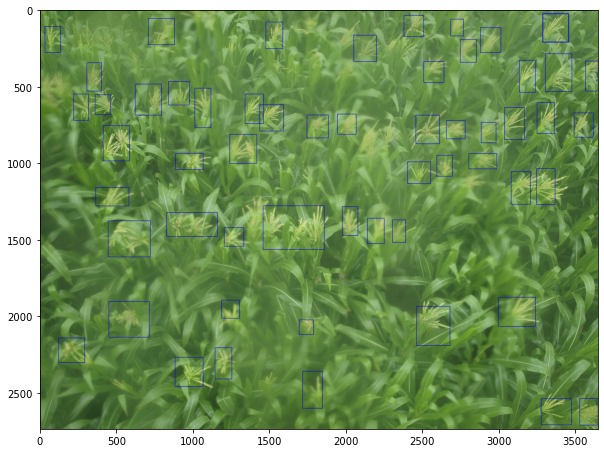

In [40]:
# let's see some images
# read first batch from train_data_loader
images, targets = next(iter(train_data_loader))

#send image to device
images = list(image.to(device) for image in images)

# targets = [{k: v.to(device) for k,v in t.items()} for t in targets]
targets = [{k: v.long().to(device) for k,v in t.items()} for t in targets]

boxes = targets[0]['boxes'].cpu().numpy().astype(np.int32)
xmin, ymin, xmax, ymax = boxes[0][0], boxes[0][1],boxes[0][2], boxes[0][3]

sample_tr = images[0].permute(1, 2, 0).cpu().numpy() # permute rearrange to 1,2,0 axis

# de-normalize
sample_tr = sample_tr *  255.

print(f"img has shape of {sample_tr.shape}")
print(f"boxes is {boxes}")
print(f"dimension of boxeses  are {xmin}, {ymin}, {xmax}, {ymax}")


fig, ax = plt.subplots(1, 1, figsize=(10,8))

for box in boxes:
    cv2.rectangle(sample_tr,
                 (box[0], box[1]),
                 (box[2], box[3]), 
                # (5, 40), (81, 95),
                  color=(0, 0, 225),
                  thickness=2)

# for i in range(len(boxes)):
#     cv2.rectangle(sample_tr, 
#                   (boxes[i][0], boxes[i][1]),
#                   (boxes[i][2], boxes[i][3]),
#                   (0, 0 , 225), 3)


# ax.set_axis_off()
# ax.imshow(sample_tr)  #works but no bounding boxes


sample_tr = cv2.rectangle(sample_tr, (xmin,ymin), (xmax, ymax), color=(0,0,225 ), thickness=3)
plt.imshow((sample_tr).astype(np.uint8)); # blank screen - nothing display

In [41]:
#Fine Tuning Pre-Trained Model
#load a pre-trained model with resnet50 as backbone
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# replace the classifier with a new one
num_classes = 2 # 1 class(maize) and 0(background)

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head wit the new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [50]:
# Training parameters
num_epochs = 1 #100
learning_rate = 1e-4
loss_hist = Averager()

model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params=params, lr =learning_rate, momentum = 0.9, weight_decay= 0.005)
# lr_scheduler = None

# USE ADAM
# optimizer = torch.optim.Adam(params= params, lr = learning_rate)

start_time = time.time()
total_train_loss = []

for epoch in range(num_epochs):
    loss_hist.reset()
    star_time = time.time()
    train_loss = []
    model.train()

    for images, targets in train_data_loader:
        
        #send images and targets to device
        images = list(image.to(device) for image in images)
        # targets = [{k: v.to(device) for k,v in t.items()} for t in targets]
        targets = [{k: v.long().to(device) for k,v in t.items()} for t in targets]

        
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())
        # print(f'diff losses are {loss_dict.keys()} ')
        train_loss.append(losses.item())
        # print(f"train losss is {train_loss}")
        loss_hist.send(losses.item())

        optimizer.zero_grad() # to clear old gradient to zero
        losses.backward() # back prop for required_grade = True
        optimizer.step() # update parameter based on parameter.grad

    epoch_train_loss = np.mean(train_loss)
    # print(f"Epoch_train_loss is {epoch_train_loss}")
    total_train_loss.append(epoch_train_loss)
        
        #     print(f'Iterattion #{iter}  loss: {loss_value}')

        # itr += 1
        # if lr_scheduler is not None:
        #     lr_scheduler.step() # for adjusting the learning rate

    # print(f'Epoch #{epoch+1} loss: {epoch_train_loss}')
    print(f'Epoch #{epoch+1} loss: {loss_hist.value}')


    evaluate(model, test_data_loader, device=device )

# save check points at every epochs

end_time = time.time()
print(f"\n Total training time is {end_time - start_time} seconds \n")
# save model    
torch.save(model.state_dict(),  "faster_rcnn.pth")
torch.save(model, 'faster_rcnn.pt')

Epoch #1 loss: 1.3001867111991434
creating index...
index created!
Test:  [ 0/17]  eta: 0:13:35  model_time: 45.9642 (45.9642)  evaluator_time: 0.2858 (0.2858)  time: 47.9654  data: 1.6934
Test:  [16/17]  eta: 0:00:49  model_time: 45.9653 (47.0790)  evaluator_time: 0.4140 (0.5050)  time: 49.3232  data: 1.6613
Test: Total time: 0:13:58 (49.3258 s / it)
Averaged stats: model_time: 45.9653 (47.0790)  evaluator_time: 0.4140 (0.5050)
Accumulating evaluation results...
DONE (t=0.12s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.504
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.028
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.047
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.154
 Average Recall   

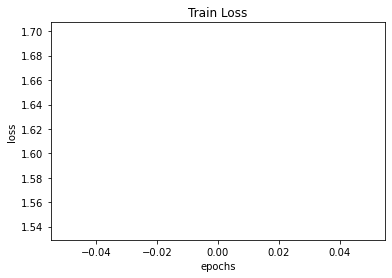

In [43]:
plt.title('Train Loss')
plt.plot(total_train_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

nms_out is [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
outputs is [{'boxes': tensor([[7.8080e+02, 6.6403e+02, 9.2761e+02, 9.3717e+02],
        [5.8542e+02, 2.0882e+03, 7.2142e+02, 2.2678e+03],
        [9.6916e+02, 2.2874e+03, 1.0871e+03, 2.4243e+03],
        [3.4798e+03, 9.0997e+01, 3.6409e+03, 3.3751e+02],
        [1.5033e+03, 0.0000e+00, 1.5843e+03, 1.7286e+02],
        [1.8371e+03, 3.7726e+02, 1.9129e+03, 5.3199e+02],
        [9.0221e+01, 2.2683e+03, 2.3200e+02, 2.3971e+03],
        [2.1574e+03, 3.8006e+02, 2.2516e+03, 5.9320e+02],
        [3.5326e+03, 1.0671e+02, 3.6477e+03, 2.9445e+02],
        [2.6127e+03, 2.3625e+01, 2.7271e+03, 1.6435e+02],
        [2.3497e+03, 4.2797e+02, 2.4406e+03, 6.0597e+02],
        [4.0936e+01, 1.

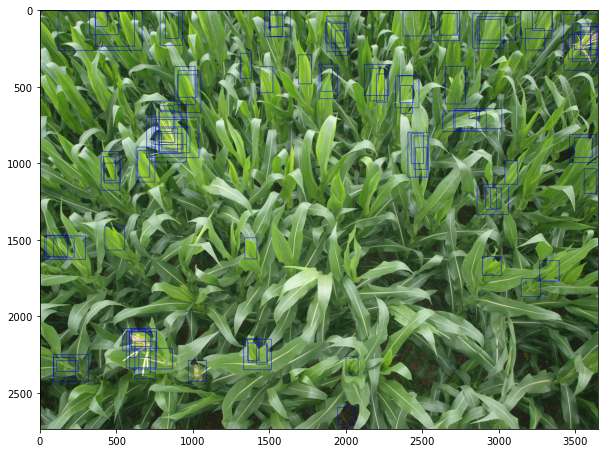

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
# Validation of model 
model = torch.load('faster_rcnn.pt')
images_val, targets  = next(iter(test_data_loader)) # test_data_loader

images_val = list(img.to(device) for img in images_val)
# targets = [{k: v.to(device) for k,v in t.items()} for t in targets]
# print(f"target is {targets}")
# boxes = targets[0]['boxes'].cpu().numpy().astype(np.int32)
sample_val = images_val[0].permute(1, 2, 0).cpu().numpy() # permute re-arrange the axes
sample_val = sample_val * 255. # de-normalize 

#get the bounding box from model
model.eval()
cpu_device = torch.device('cpu')

outputs = []
outputs = model(images_val)

# NMS 
nms_out = (torchvision.ops.nms(boxes= outputs[0]['boxes'], scores= outputs[0]['scores'], iou_threshold= 0.5)).cpu().numpy()
print(f"nms_out is {nms_out}")

outputs = [{k: v.to(cpu_device) for k,v in t.items()} for t in outputs]
print(f"outputs is {outputs}")
outs_val = outputs[nms_out[0]]['boxes'].cpu().detach().numpy().astype(np.int32)
# outs_val = outs_val[nms_out[0]]


for box in outs_val:
    print(f"box is {box}")
    cv2.rectangle(sample_val,
                #   (box, box),
                #   (box[2], box[3]),
                  (box[0], box[1]),
                  (box[2], box[3]),
                  (0, 0, 225),
                  2
                  )


# image = cv2.rectangle(image, (xmin,ymin), (xmax, ymax), (0,0,225 ), 2)

plt.imshow((sample_val).astype(np.uint8))